In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Specify the Excel file path
excel_file_path = '/content/cdc-diabetes-2018.xlsx'
# Using pandas `read_excel` function to read all sheets into a dictionary
all_data = pd.read_excel(excel_file_path, sheet_name=None)
# Access individual DataFrames by sheet name
df1 = all_data['Diabetes']
df2 = all_data['Obesity']
df3 = all_data['Inactivity']


In [ ]:
#DATA CREATION
obesity_summary = df2.describe()
obesity_summary =df2.info()
obesity_summary=df2.head(5)
print(obesity_summary)


In [ ]:
#DATA CREATION FOR INACTIVITY
inactivity_summary = df3.describe()
inactivity_summary


In [ ]:
df1.rename(columns={'STATEW': 'STATE'}, inplace=True)
df3.rename(columns={'FIPDS': 'FIPS'}, inplace=True)
# Inner join df1 and df2 on the 'FIPS' column
merged_df = pd.merge(df1, df2, on='FIPS', how='inner')
# Inner join the result with df3 on the 'FIPS' column
all_common_data = pd.merge(merged_df, df3, on='FIPS', how='inner')
# Prepare the input features (X) and target variable (y)
X = all_common_data[['% OBESE', '% INACTIVE']]
y = all_common_data['% DIABETIC']

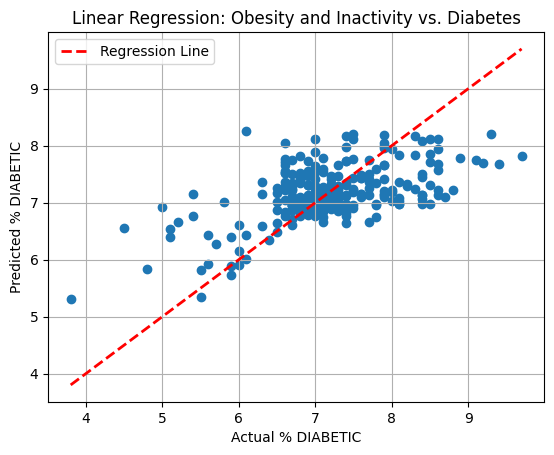

Basic Statistics for Obesity and Inactivity vs. Diabetes:
          % OBESE  % INACTIVE  % DIABETIC
count  354.000000  354.000000  354.000000
mean    18.252542   14.776271    7.115819
std      1.029484    1.544542    0.728442
min     10.500000    8.800000    3.800000
25%     17.900000   14.000000    6.800000
50%     18.300000   14.400000    7.000000
75%     18.975000   15.475000    7.400000
max     19.500000   19.400000    9.700000

Mean Squared Error (MSE): 0.3488332863112432
R-squared (R2) Value: 0.34073967115731396
Coefficients: [0.11106297 0.23246992]
Intercept: 1.6535991518559392


In [ ]:
# Create a linear regression model %inactivity & %Obesity vs % diabetes
model = LinearRegression()
model.fit(X, y)

# Predict the target variable based on the input features
y_pred = model.predict(X)

# Create a scatter plot of the data points
plt.scatter(y, y_pred)
plt.xlabel('Actual % DIABETIC')
plt.ylabel('Predicted % DIABETIC')
plt.title('Linear Regression: Obesity and Inactivity vs. Diabetes')
plt.grid(True)
# Add the regression line to the plot
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
# Calculate the R-squared value
r2 = r2_score(y, y_pred)
# Print basic statistics, MSE, and R-squared
print("Basic Statistics for Obesity and Inactivity vs. Diabetes:")
print(all_common_data[['% OBESE', '% INACTIVE', '% DIABETIC']].describe())
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2) Value:", r2)
# Get the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_
# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

#

In [ ]:
## performing cross-validation using k-fold method
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Replace with your desired model

k_val=5
kf = KFold(n_splits=k_val, shuffle=True, random_state=70)
scores = cross_val_score(model, X, y, cv=kf)

print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation of accuracy:", np.std(scores))



Cross-validation scores: [ 0.36545111  0.43480588  0.25240166  0.3667067  -0.0096284 ]
Mean accuracy: 0.2819473904107684
Standard deviation of accuracy: 0.15710641128705793


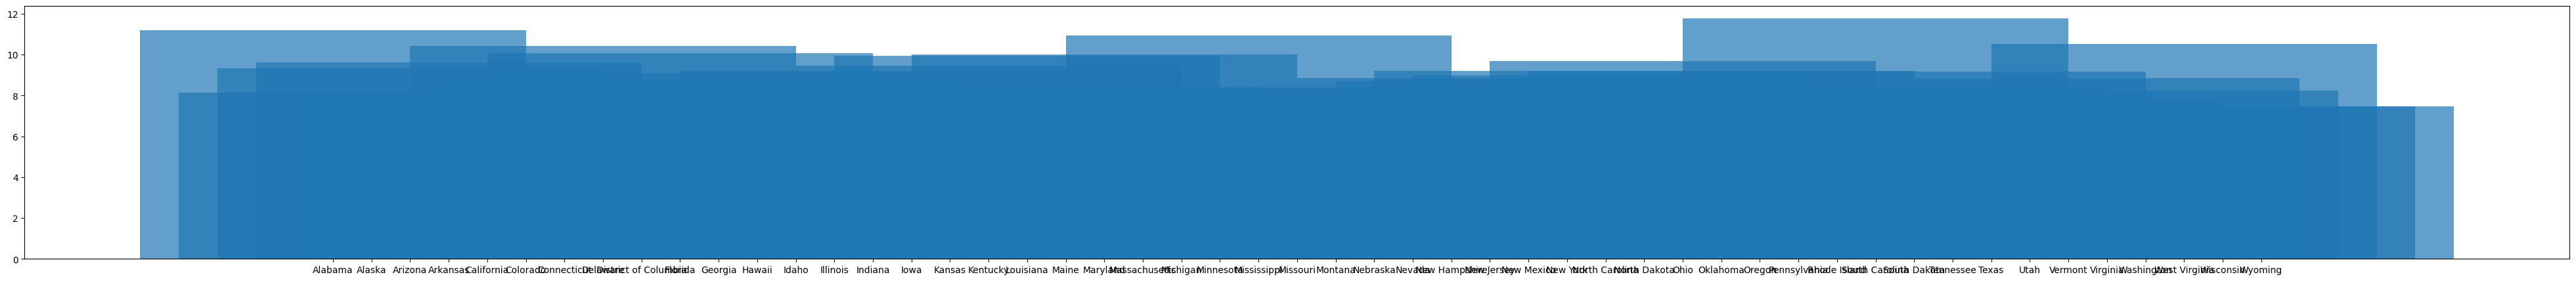

In [ ]:
##Plotting mean of diabetic patients per State
mean_per_state=df1.groupby('STATE')['% DIABETIC'].mean().reset_index()
State=df1['STATE']

mean_state=mean_per_state['STATE']
mean_per_state_diabetic=mean_per_state['% DIABETIC']
plt.figure(figsize=(50,5))
plt.bar(mean_state, mean_per_state_diabetic, width=10,alpha=0.7)
plt.show()



In [ ]:
# correlation between column 1 and column2
print(all_common_data['% DIABETIC'].corr(all_common_data['% INACTIVE']))


0.5671037350564144


mean of diabetes 7.628832116788321
standard deviation of diabetics 1.0162777193101065
Median Diabetes 7.45
kurtosis of diabetics 1.138793189854467
skewness of diabetics 0.6593378810198804


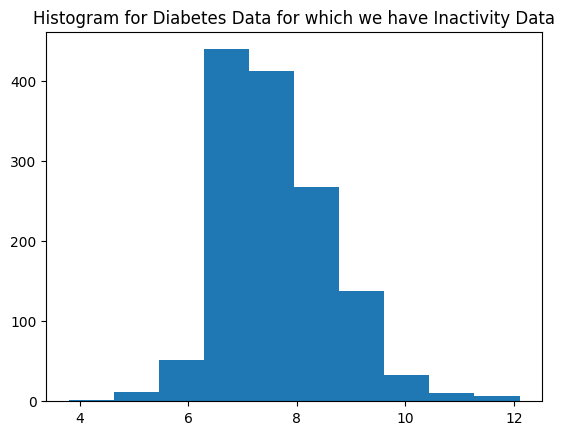

In [ ]:
# Descriptive Statistics for 1370 %diabetes data for which we have %inactivity data.
intersection_of_diabetic_inactivity = pd.merge(df1, df3, on='FIPS', how='inner')
mean_diabetes = intersection_of_diabetic_inactivity['% DIABETIC'].mean()
median_diabetes = intersection_of_diabetic_inactivity['% DIABETIC'].median()
std_dev_diabetics=intersection_of_diabetic_inactivity['% DIABETIC'].std()
kurtosis_diabetics=intersection_of_diabetic_inactivity['% DIABETIC'].kurtosis()
print("mean of diabetes",mean_diabetes)
print("standard deviation of diabetics",std_dev_diabetics)
print("Median Diabetes",median_diabetes)
print("kurtosis of diabetics",kurtosis_diabetics)
print("skewness of diabetics",intersection_of_diabetic_inactivity['% DIABETIC'].skew())

#Plotting Histogram
plt.hist(intersection_of_diabetic_inactivity['% DIABETIC'])
plt.title("Histogram for Diabetes Data for which we have Inactivity Data")
plt.show()

mean of inactivity 16.54335766423358
standard deviation of inactivity 1.9260098438825035
Median inactivity 16.7
kurtosis of inactivity -0.5466491902225425
skewness of inactivity -0.3424166225426183


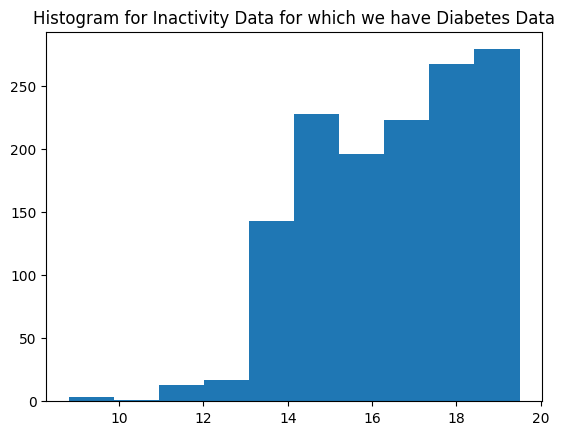

In [ ]:
# Descriptive Statistics for 1370 %Inactive data for which we have %Diabetic data.
intersection_of_diabetic_inactivity = pd.merge(df1, df3, on='FIPS', how='inner')
mean_inactivity = intersection_of_diabetic_inactivity['% INACTIVE'].mean()
median_inactivity = intersection_of_diabetic_inactivity['% INACTIVE'].median()
std_dev_inactivity=intersection_of_diabetic_inactivity['% INACTIVE'].std()
kurtosis_inactivity=intersection_of_diabetic_inactivity['% INACTIVE'].kurtosis()
print("mean of inactivity",mean_inactivity)
print("standard deviation of inactivity",std_dev_inactivity)
print("Median inactivity",median_inactivity)
print("kurtosis of inactivity",kurtosis_inactivity)
print("skewness of inactivity",intersection_of_diabetic_inactivity['% INACTIVE'].skew())

#Plotting Histogram
plt.hist(intersection_of_diabetic_inactivity['% INACTIVE'])
plt.title("Histogram for Inactivity Data for which we have Diabetes Data")
plt.show()

In [ ]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

model = smf.ols(formula='y ~ X', data=all_common_data)
residual = model.fit()
print(residual.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     90.71
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.76e-32
Time:                        13:38:40   Log-Likelihood:                -315.89
No. Observations:                 354   AIC:                             637.8
Df Residuals:                     351   BIC:                             649.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6536      0.562      2.941      0.0

In [ ]:
# Test for heteroscedasticity using the Breusch-Pagan test
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(residual.resid, residual.model.exog)

print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

if bp_lm_pvalue < 0.05:
    print("Heteroscedasticity detected")
else:
    print("No heteroscedasticity detected")

Lagrange multiplier statistic: 20.48866439862667
Lagrange multiplier p-value:   3.555846910402045e-05
F-statistic:                   10.781524398489358
P-value of F-statistic:        2.8565231116725525e-05
Heteroscedasticity detected


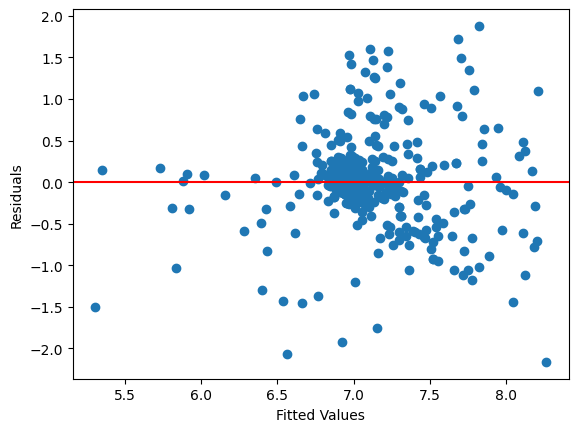

In [ ]:
# Plot fitted values vs. residuals to test for heteroskedasticity
plt.scatter(residual.fittedvalues, residual.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r')
plt.show()